# Part II - Trip Pattern of Users in the Ford GoBike System
## by Itunu Agbokeye

## Investigation Overview


The objective of investigating this data set  is to examine the trip pattern of users in the Fordgobike  System. The main features of interest are trip period, Usertype, gender, age, Bike share for all trips.



## Dataset Overview

The Fordgoike raw dataset contains 183412 rows and 16 columns. However, following the data cleaning process the date set became 174952 distinct rows and 29 features which include: duration sec, start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, user type, member birth year, member gender, bike share for all trip, duration min, duration hr, start time Y, start time M, start time W, start time D, end time Y, end time M, end time W, end time D

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import datetime as dt
from datetime import date

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
Ford_df = pd.read_csv('201902-fordgobike-tripdata.csv')

Ford_df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [4]:
Ford_df.dropna(inplace = True)

In [5]:
Ford_df['start_time'] = pd.to_datetime(Ford_df['start_time'])
Ford_df['end_time'] = pd.to_datetime(Ford_df['end_time'])
Ford_df['start_station_id'] = Ford_df['start_station_id'].astype(str)
Ford_df['end_station_id'] = Ford_df['end_station_id'].astype(str)
Ford_df['bike_id'] = Ford_df['bike_id'].astype(str)
Ford_df['member_birth_year'] = Ford_df['member_birth_year'].round(0)
Ford_df['member_birth_year'] = Ford_df['member_birth_year'].astype(int)

In [6]:
Ford_df['duration_min'] = Ford_df['duration_sec']/60
Ford_df['duration_hr'] = Ford_df['duration_sec']/3600
Ford_df['duration_min'] = Ford_df['duration_min'].astype(int)
Ford_df['duration_hr']= Ford_df['duration_hr'].astype(float).round(2)

In [7]:
Ford_df['start_time_Y'] = Ford_df.start_time.dt.strftime('%Y');
Ford_df['start_time_M'] = Ford_df.start_time.dt.strftime('%B');
Ford_df['start_time_W'] = Ford_df.start_time.dt.strftime('%W');
Ford_df['start_time_D'] = Ford_df.start_time.dt.strftime('%A');
Ford_df['start_time_H'] = Ford_df.start_time.dt.hour
Ford_df['end_time_Y'] = Ford_df.end_time.dt.strftime('%Y');
Ford_df['end_time_M'] = Ford_df.end_time.dt.strftime('%B');
Ford_df['end_time_W'] = Ford_df.end_time.dt.strftime('%W');
Ford_df['end_time_D'] = Ford_df.end_time.dt.strftime('%A');
Ford_df['end_time_H'] = Ford_df.end_time.dt.hour

In [8]:
current_year = date.today().year
Ford_df = Ford_df.assign(age=lambda x: current_year - x.member_birth_year)
Ford_df.age = Ford_df.age.astype(int)

In [9]:
Ford_df.info()
Ford_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 29 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
duration_min               174952 non-null int64
duration_hr           

(174952, 29)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## User Type Distribution
There are two categories of users in the Fordgobike system (Subscribers and Customers). However, analysis showed that there are more subscribers than customers.


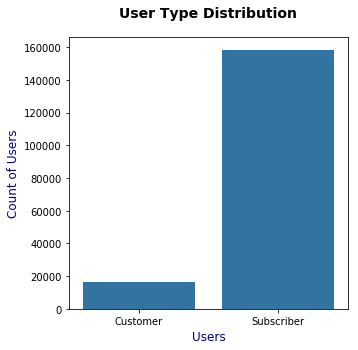

In [10]:
plt.figure(figsize=(5,5))
plt.title("User Type Distribution", y=1.05, fontsize=14, fontweight ='bold')
sns.countplot(data=Ford_df,x='user_type', color=sns.color_palette()[0])
plt.xlabel('Users', fontsize=12, color = 'darkblue')
plt.ylabel('Count of Users', fontsize=12, color = 'darkblue')
plt.show()

# Gender Distribution
The distibution shows that there are three categories of genders (Male, Female, Others). The male gender is the most dominant in the system.

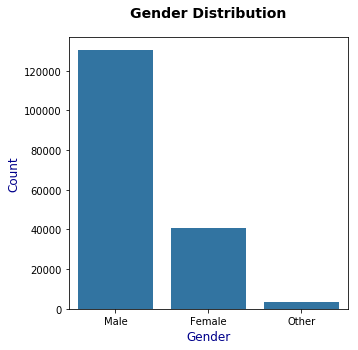

In [11]:
plt.figure(figsize=(5,5))
plt.title("Gender Distribution", y=1.05, fontsize=14, fontweight ='bold')
gender = ['Male', 'Female', 'Other']
sns.countplot(data=Ford_df,x='member_gender', color=sns.color_palette()[0], order = gender)
plt.xlabel('Gender',fontsize=12, color = 'darkblue')
plt.ylabel('Count',fontsize=12, color = 'darkblue');

## Trip Duration Distribution

The analysis of the Fordgobike system, shows that most of the trips taken last for 5 to 10 minutes, However the highest trip count last for 7 minutes

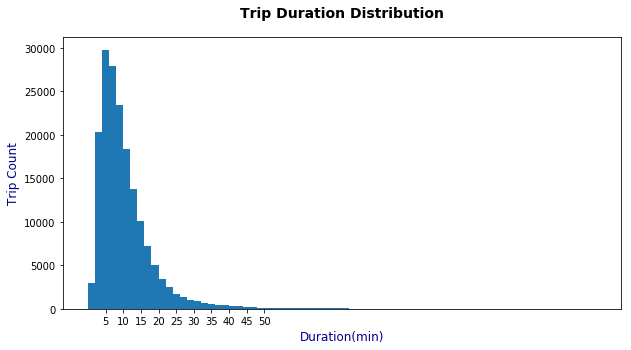

In [12]:
binsize = 2
bins = np.arange(0,Ford_df['age'].max()+binsize, binsize)
plt.figure(figsize=(10,5))
plt.title('Trip Duration Distribution', y=1.05, fontsize=14, fontweight ='bold')
plt.hist(data=Ford_df, x= 'duration_min', bins=bins)
plt.xlabel('Duration(min)', fontsize=12, color = 'darkblue')
plt.ylabel('Trip Count', fontsize=12, color = 'darkblue')
plt.xticks([5,10,15,20,25,30,35,40,45,50])
plt.show()

## Age Distribution

The age distribution of the data set shows that 33 years is the dominant age while the mean age is 37 years.



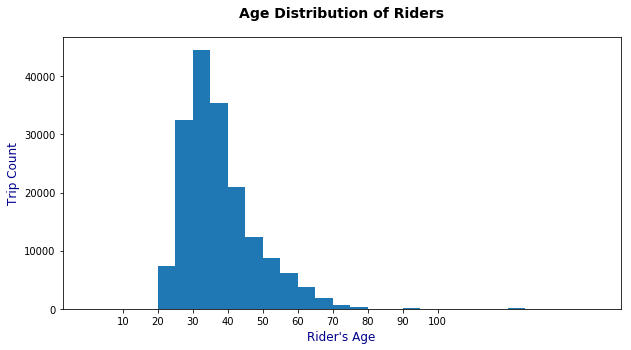

In [13]:
binsize = 5
bins = np.arange(0,Ford_df['age'].max()+binsize, binsize)
plt.figure(figsize=(10,5))
plt.title("Age Distribution of Riders", y=1.05, fontsize=14, fontweight ='bold')
plt.hist(x ='age',data=Ford_df, bins=bins)
plt.xlabel("Rider's Age", fontsize=12, color = 'darkblue')
plt.ylabel('Trip Count', fontsize=12, color = 'darkblue')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.show()

## User Type/ Trip Distribution

From the user type/trip distribution, it can be concluded that Thursdays and Tuesdays recorded higher number of daily trips while Saturday and Sundays recorded lesser trips.
The subscriber make very low trips on Saturdays and Sundays, they make most of their tripson Monday to Friday and the peak periods are mornings between the hours of 7-9 and evenings between the hours of 16 - 19. For customers, they make trips all the days of the week, however we can deduce that they make more weekend trips betweeen the hours of 10 - 15. On Mondays to Fridays trips are significant in the morning at 8 and in the evening at the 17th hour

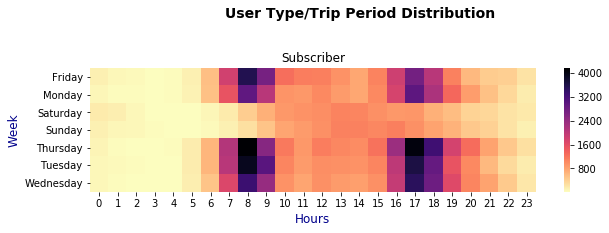

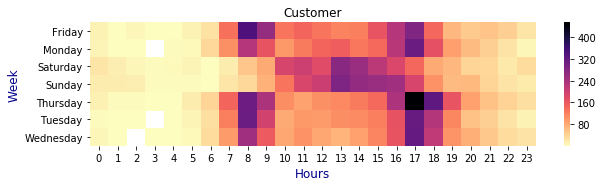

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.suptitle('User Type/Trip Period Distribution', y=1.05, fontsize=14, fontweight ='bold')
subscriber_data = Ford_df.query('user_type == "Subscriber"')
subscriber = subscriber_data.groupby(['start_time_D', 'start_time_H']).size().reset_index(name='count').pivot(index='start_time_D', columns ='start_time_H', values = 'count')
sns.heatmap(subscriber, cmap = 'magma_r')
plt.xlabel('Hours', fontsize=12, color = 'darkblue')
plt.ylabel('Week', fontsize=12, color = 'darkblue')
plt.title('Subscriber')


plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
customer_data = Ford_df.query('user_type == "Customer"')
customer = customer_data.groupby(['start_time_D', 'start_time_H']).size().reset_index(name='count').pivot(index='start_time_D', columns ='start_time_H', values = 'count')
sns.heatmap(customer, cmap = 'magma_r')
plt.xlabel('Hours', fontsize=12, color = 'darkblue')
plt.ylabel('Week', fontsize=12, color = 'darkblue')
plt.title('Customer')
plt.show()

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 371628 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
